# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [160]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [161]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [162]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739411e+12
1,South Michelleport,3/4/19 18:24,30.24,2.343912e+12
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005066e+12
3,Rodneyfort,2/10/19 23:22,23.44,5.149245e+12
4,South Jack,3/6/19 4:28,34.58,3.908451e+12


### Merge the DataFrames

In [163]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908451e+12,46,Urban


In [164]:
#clean the data- check the: .count(), .isnull().sum()
pyber_data_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [165]:
pyber_data_df.isnull().sum()
#clean data 

city            0
date            0
fare            0
ride_id         0
driver_count    0
type            0
dtype: int64

## Deliverable 1: Get a Summary DataFrame 

In [180]:
#  1. Get the total rides for each city type- use 
total_rides_city_types= pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides_city_types

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [181]:
# 2. Get the total drivers for each city type
total_drivers_city_types= city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_city_types

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [182]:
#  3. Get the total amount of fares for each city type
total_fares_city_types= pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_city_types

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [183]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride_city_type= total_fares_city_types/ total_rides_city_types 
avg_fare_ride_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [184]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver_city_type= total_fares_city_types/total_drivers_city_types
avg_fare_driver_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [185]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_city_types,
                                 "Total Drivers": total_drivers_city_types,
                                 "Total Fares": total_fares_city_types,  
                                 "Average Fare per Ride": avg_fare_ride_city_type,
                                 "Average Fare per Driver": avg_fare_driver_city_type})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [186]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [187]:
#  8. Format the columns.
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides_city_types,
                                 "Total Drivers": total_drivers_city_types,
                                 "Total Fares": total_fares_city_types,  
                                 "Average Fare per Ride": avg_fare_ride_city_type,
                                 "Average Fare per Driver": avg_fare_driver_city_type})
pyber_summary_df["Total Rides"]= pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"]= pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"]=pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"]= pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"]=pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [188]:
# 1. Read the merged DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908451e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/19 17:04,13.38,8.550365e+12,6,Rural
2371,Lake Latoyabury,1/30/19 0:05,20.76,9.018728e+12,2,Rural
2372,North Jaime,2/10/19 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/19 19:22,44.94,4.256853e+12,4,Rural


In [189]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#if you add double brackets around fares- it makes the output cleaner and more formatted? why?
total_fares_per_city_type_and_date_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
total_fares_per_city_type_and_date_df

fare
type  date                
Rural 1/1/19 9:45    43.69
      1/11/19 4:39   16.42
      1/14/19 15:58  54.10
      1/14/19 7:09   18.05
      1/15/19 21:44  30.26
...                    ...
Urban 5/8/19 1:54    32.69
      5/8/19 2:31    41.33
      5/8/19 4:20    21.99
      5/8/19 4:39    18.45
      5/8/19 7:29    18.55

[2364 rows x 1 columns]

In [190]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fares_per_city_type_and_date_df = total_fares_per_city_type_and_date_df.reset_index()
total_fares_per_city_type_and_date_df

,type,date,fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26
...,...,...,...
2359,Urban,5/8/19 1:54,32.69
2360,Urban,5/8/19 2:31,41.33
2361,Urban,5/8/19 4:20,21.99
2362,Urban,5/8/19 4:39,18.45


In [191]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fares_per_city_type_and_date_pivot = total_fares_per_city_type_and_date_df.pivot(index="date", columns="type", values="fare")
total_fares_per_city_type_and_date_pivot.head()

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31


In [192]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
select_fare_date= total_fares_per_city_type_and_date_pivot.loc['1/1/19':'4/29/2019']
select_fare_date.head()

type,Rural,Suburban,Urban
date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31


In [193]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
select_fare_date.index= pd.to_datetime(select_fare_date_df.index)
select_fare_date.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [194]:
# 7. Check that the datatype for the index is datetime using df.info()
select_fare_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2079 entries, 2019-01-01 00:08:00 to 2019-04-29 07:50:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     107 non-null    float64
 1   Suburban  544 non-null    float64
 2   Urban     1430 non-null   float64
dtypes: float64(3)
memory usage: 65.0 KB


In [195]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_of_fares_per_week= select_fare_date.resample("W").sum()
sum_of_fares_per_week.head(18)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


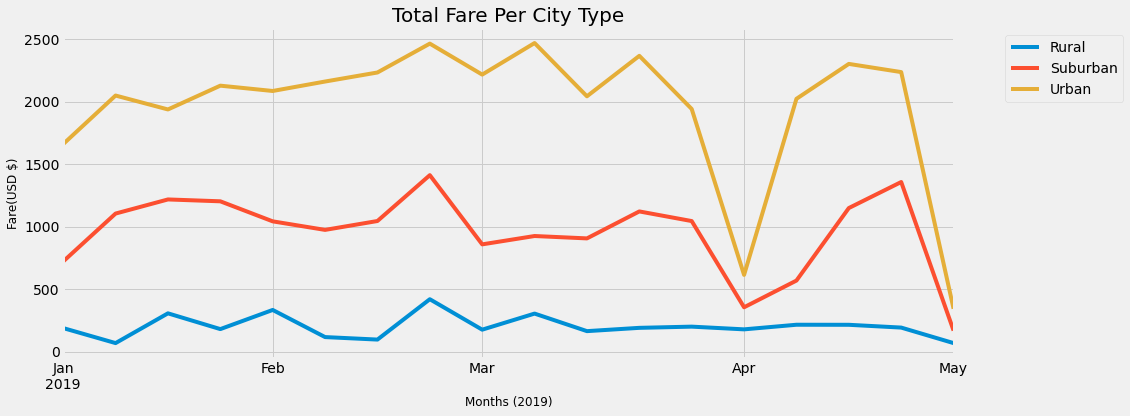

type,Rural,Suburban,Urban
count,18.000000,18.000000,18.000000
mean,200.139444,954.370556,1961.065000
std,92.140274,326.463661,576.243614
min,67.600000,167.920000,342.630000
25%,166.327500,870.395000,1963.140000
50%,188.840000,1043.925000,2108.225000
75%,214.485000,1142.502500,2237.485000
max,419.060000,1412.740000,2470.930000


In [205]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
ax= sum_of_fares_per_week.plot(figsize=(16,6))
ax.plot()
ax.set_title('Total Fare Per City Type', fontsize=20)
ax.set_ylabel('Fare(USD $)', fontsize=12)
ax.set_xlabel("Months (2019)",fontsize= 12)
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
#relocate the legend- its in the middle 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc= 'upper left')
plt.tight_layout()
plt.grid(True)
plt.savefig("analysis/pyber_fare_summary.png")
plt.show()
sum_of_fares_per_week.describe()